[Reference](https://towardsdatascience.com/more-robust-multivariate-eda-with-statistical-testing-d221fc145870)

In [1]:
# import libraries
import seaborn as sns
import pandas as pd

# load dataset via seaborn lib
df = sns.load_dataset("mpg")

# inspect missing values
df.isna().sum() #result: minimal, hence OK to remove

# remove missing values
df.dropna(inplace=True)

# create a new categorical column based on mpg column
df["efficiency"] = df["mpg"].apply(lambda x: "yes" if x >= 25 else "no")

# dataframe info
df.info()

# dataframe head
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
 9   efficiency    392 non-null    object 
dtypes: float64(4), int64(3), object(3)
memory usage: 33.7+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,efficiency
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,no
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,no
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,no
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,no
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,no


# Numeric-to-Numeric Relationship

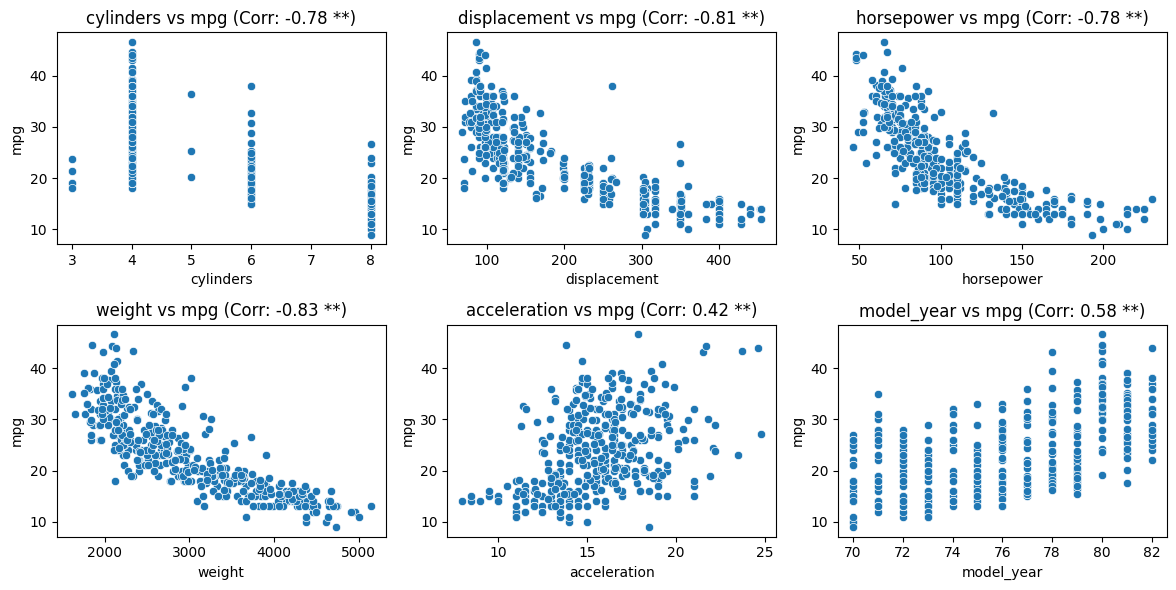

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# prepare variables to inspect
numeric_features = ['cylinders','displacement','horsepower',
                    'weight','acceleration','model_year']
target = 'mpg'

# Create a figure and axis
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

# Loop through the numerical columns and plot each scatter plot
for i, col in enumerate(numeric_features):
    # Calculate Pearson correlation coefficient
    corr_coeff, p_val = pearsonr(df[col],df[target])

    # Scatter plot using seaborn
    sns.scatterplot(data=df, x=col, y=target, ax=axes[i//3, i%3])

    # Set title with Pearson correlation coefficient
    # Print ** after the correlation if the correlation coefficient is significant
    axes[i//3, i%3].set_title(f'{col} vs {target} (Corr: {corr_coeff:.2f} {"**" if p_val < 0.05 else ""})')

plt.tight_layout()
plt.show()

# Numeric-to-Categoric Relationship

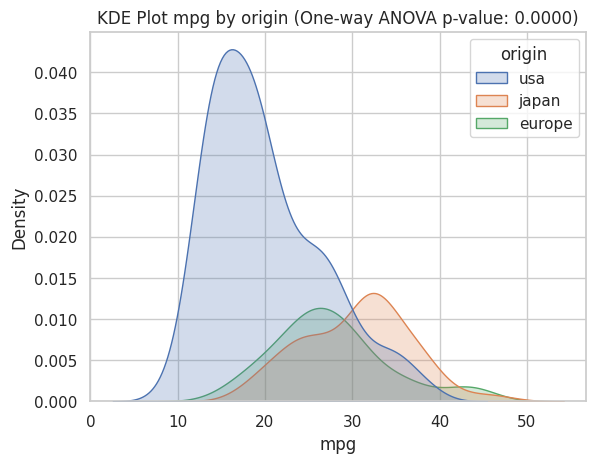

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Create a KDE plot with hue
sns.set(style="whitegrid")
ax = sns.kdeplot(data=df, x="mpg", hue="origin", fill=True)

# Calculate one-way ANOVA p-value
p_value = f_oneway(*[df[df['origin'] == cat]['mpg'] for cat in df['origin'].unique()])[1]

# Set title with one-way ANOVA p-value
ax.set_title(f'KDE Plot mpg by origin (One-way ANOVA p-value: {p_value:.4f})')

plt.show()

# Categoric-to-Categoric Relationship

In [4]:
# create frequency table of each origin-efficient pair
chi_df = (
    df[['origin','efficiency']]
    .value_counts()
    .reset_index()
    .sort_values(['origin','efficiency'], ignore_index=True)
)

# calculate expected frequency for each pair
n = chi_df['count'].sum()

exp = []
for i in range(len(chi_df)):
  sum_row = chi_df.loc[chi_df['origin']==chi_df['origin'][i],'count'].sum()
  sum_col = chi_df.loc[chi_df['efficiency']==chi_df['efficiency'][i],'count'].sum()
  e = sum_row * sum_col / n
  exp.append(e)

chi_df['exp'] = exp
chi_df

,origin,efficiency,count,exp
0,europe,no,21,39.204082
1,europe,yes,47,28.795918
2,japan,no,18,45.545918
3,japan,yes,61,33.454082
4,usa,no,187,141.250000
5,usa,yes,58,103.750000


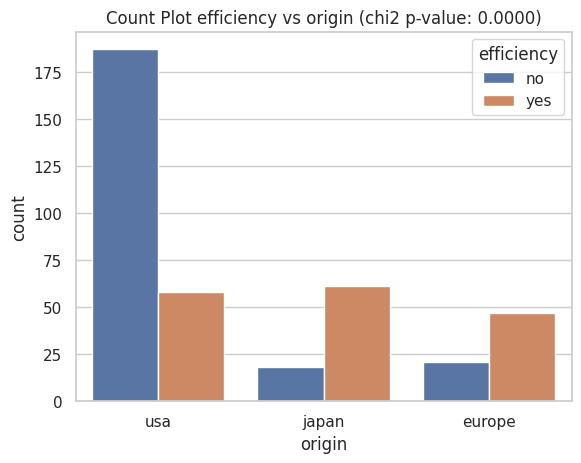

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# Create a count plot with hue
sns.set(style="whitegrid")
ax = sns.countplot(data=df, x="origin", hue="efficiency", fill=True)

# Calculate chi-square p-value
p_value = chisquare(chi_df['count'], chi_df['exp'])[1]

# Set title with chi-square p-value
ax.set_title(f'Count Plot efficiency vs origin (chi2 p-value: {p_value:.4f})')

plt.show()